#Extracción

In [1]:
import pandas as pd

In [2]:
datos=pd.read_csv('df_limpo.csv')

In [3]:
datos.head(3)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85


In [4]:
datos.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod', 'Total.Day',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [5]:
# Cambiando punto por Guion, para evitar problemas más adelante..
columnas_con_puntos = [
    'customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
    'customer.Partner', 'customer.Dependents', 'customer.tenure',
    'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
    'internet.OnlineSecurity', 'internet.OnlineBackup',
    'internet.DeviceProtection', 'internet.TechSupport',
    'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
    'account.PaperlessBilling', 'account.PaymentMethod', 'Total.Day',
    'account.Charges.Monthly', 'account.Charges.Total'
]

# Crear un diccionario para el mapeo de nombres de columna
# Reemplazar cada '.' con un '_' para un formato más seguro
columnas_renombradas = {col: col.replace('.', '_') for col in columnas_con_puntos}

# Renombrar las columnas en el DataFrame
datos = datos.rename(columns=columnas_renombradas)

datos.head(3)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,Total_Day,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85


In [6]:
#Conteo de valores nulos por fila

print(datos.isnull().sum())

customerID                    0
Churn                         0
customer_gender               0
customer_SeniorCitizen        0
customer_Partner              0
customer_Dependents           0
customer_tenure               0
phone_PhoneService            0
phone_MultipleLines           0
internet_InternetService      0
internet_OnlineSecurity       0
internet_OnlineBackup         0
internet_DeviceProtection     0
internet_TechSupport          0
internet_StreamingTV          0
internet_StreamingMovies      0
account_Contract              0
account_PaperlessBilling      0
account_PaymentMethod         0
Total_Day                    11
account_Charges_Monthly       0
account_Charges_Total        11
dtype: int64


In [7]:
# Borrar los 11 datos nulos de las columnas Total_Day y account_Charges_Total
datos = datos.dropna()

In [8]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   object 
 2   customer_gender            7032 non-null   object 
 3   customer_SeniorCitizen     7032 non-null   int64  
 4   customer_Partner           7032 non-null   object 
 5   customer_Dependents        7032 non-null   object 
 6   customer_tenure            7032 non-null   int64  
 7   phone_PhoneService         7032 non-null   object 
 8   phone_MultipleLines        7032 non-null   object 
 9   internet_InternetService   7032 non-null   object 
 10  internet_OnlineSecurity    7032 non-null   object 
 11  internet_OnlineBackup      7032 non-null   object 
 12  internet_DeviceProtection  7032 non-null   object 
 13  internet_TechSupport       7032 non-null   object 
 1

#Tratamiento de los datos

In [9]:
# Eliminar columnas innecesarias
# Se borra el customerID, no tiene relación con lo que queremos predecir
datos=datos.drop(columns=['customerID'])

In [10]:
# Copia del DataFrame
df_clean=datos.copy()

In [11]:
df_clean.columns

Index(['Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod', 'Total_Day',
       'account_Charges_Monthly', 'account_Charges_Total'],
      dtype='object')

In [12]:
# Se agruparán los datos, para evitar la multicolienalidad de las variables de internet
cols_to_fix=['internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies']

In [13]:
for col in cols_to_fix:
  df_clean[col]=df_clean[col].replace('No internet service', 'No')

In [14]:
df_clean.head(3)

,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,Total_Day,account_Charges_Monthly,account_Charges_Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85


In [15]:
#Seleccionar todas las columnas que son "Object"
categoricas = df_clean.select_dtypes(include='object').columns
categoricas

Index(['Churn', 'customer_gender', 'customer_Partner', 'customer_Dependents',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod'],
      dtype='object')

In [16]:
# uso de Dummy
df_encoded=pd.get_dummies(df_clean,columns=categoricas, drop_first=True)

In [17]:
df_encoded.head(3)

,customer_SeniorCitizen,customer_tenure,Total_Day,account_Charges_Monthly,account_Charges_Total,Churn_Yes,customer_gender_Male,customer_Partner_Yes,customer_Dependents_Yes,phone_PhoneService_Yes,...,internet_DeviceProtection_Yes,internet_TechSupport_Yes,internet_StreamingTV_Yes,internet_StreamingMovies_Yes,account_Contract_One year,account_Contract_Two year,account_PaperlessBilling_Yes,account_PaymentMethod_Credit card (automatic),account_PaymentMethod_Electronic check,account_PaymentMethod_Mailed check
0,0,9,2.20,65.6,593.30,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0,9,2.01,59.9,542.40,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,2.34,73.9,280.85,True,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False


In [18]:
df_encoded.columns

Index(['customer_SeniorCitizen', 'customer_tenure', 'Total_Day',
       'account_Charges_Monthly', 'account_Charges_Total', 'Churn_Yes',
       'customer_gender_Male', 'customer_Partner_Yes',
       'customer_Dependents_Yes', 'phone_PhoneService_Yes',
       'phone_MultipleLines_No phone service', 'phone_MultipleLines_Yes',
       'internet_InternetService_Fiber optic', 'internet_InternetService_No',
       'internet_OnlineSecurity_Yes', 'internet_OnlineBackup_Yes',
       'internet_DeviceProtection_Yes', 'internet_TechSupport_Yes',
       'internet_StreamingTV_Yes', 'internet_StreamingMovies_Yes',
       'account_Contract_One year', 'account_Contract_Two year',
       'account_PaperlessBilling_Yes',
       'account_PaymentMethod_Credit card (automatic)',
       'account_PaymentMethod_Electronic check',
       'account_PaymentMethod_Mailed check'],
      dtype='object')

#Correlación entre variables

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
corr=df_encoded.corr()

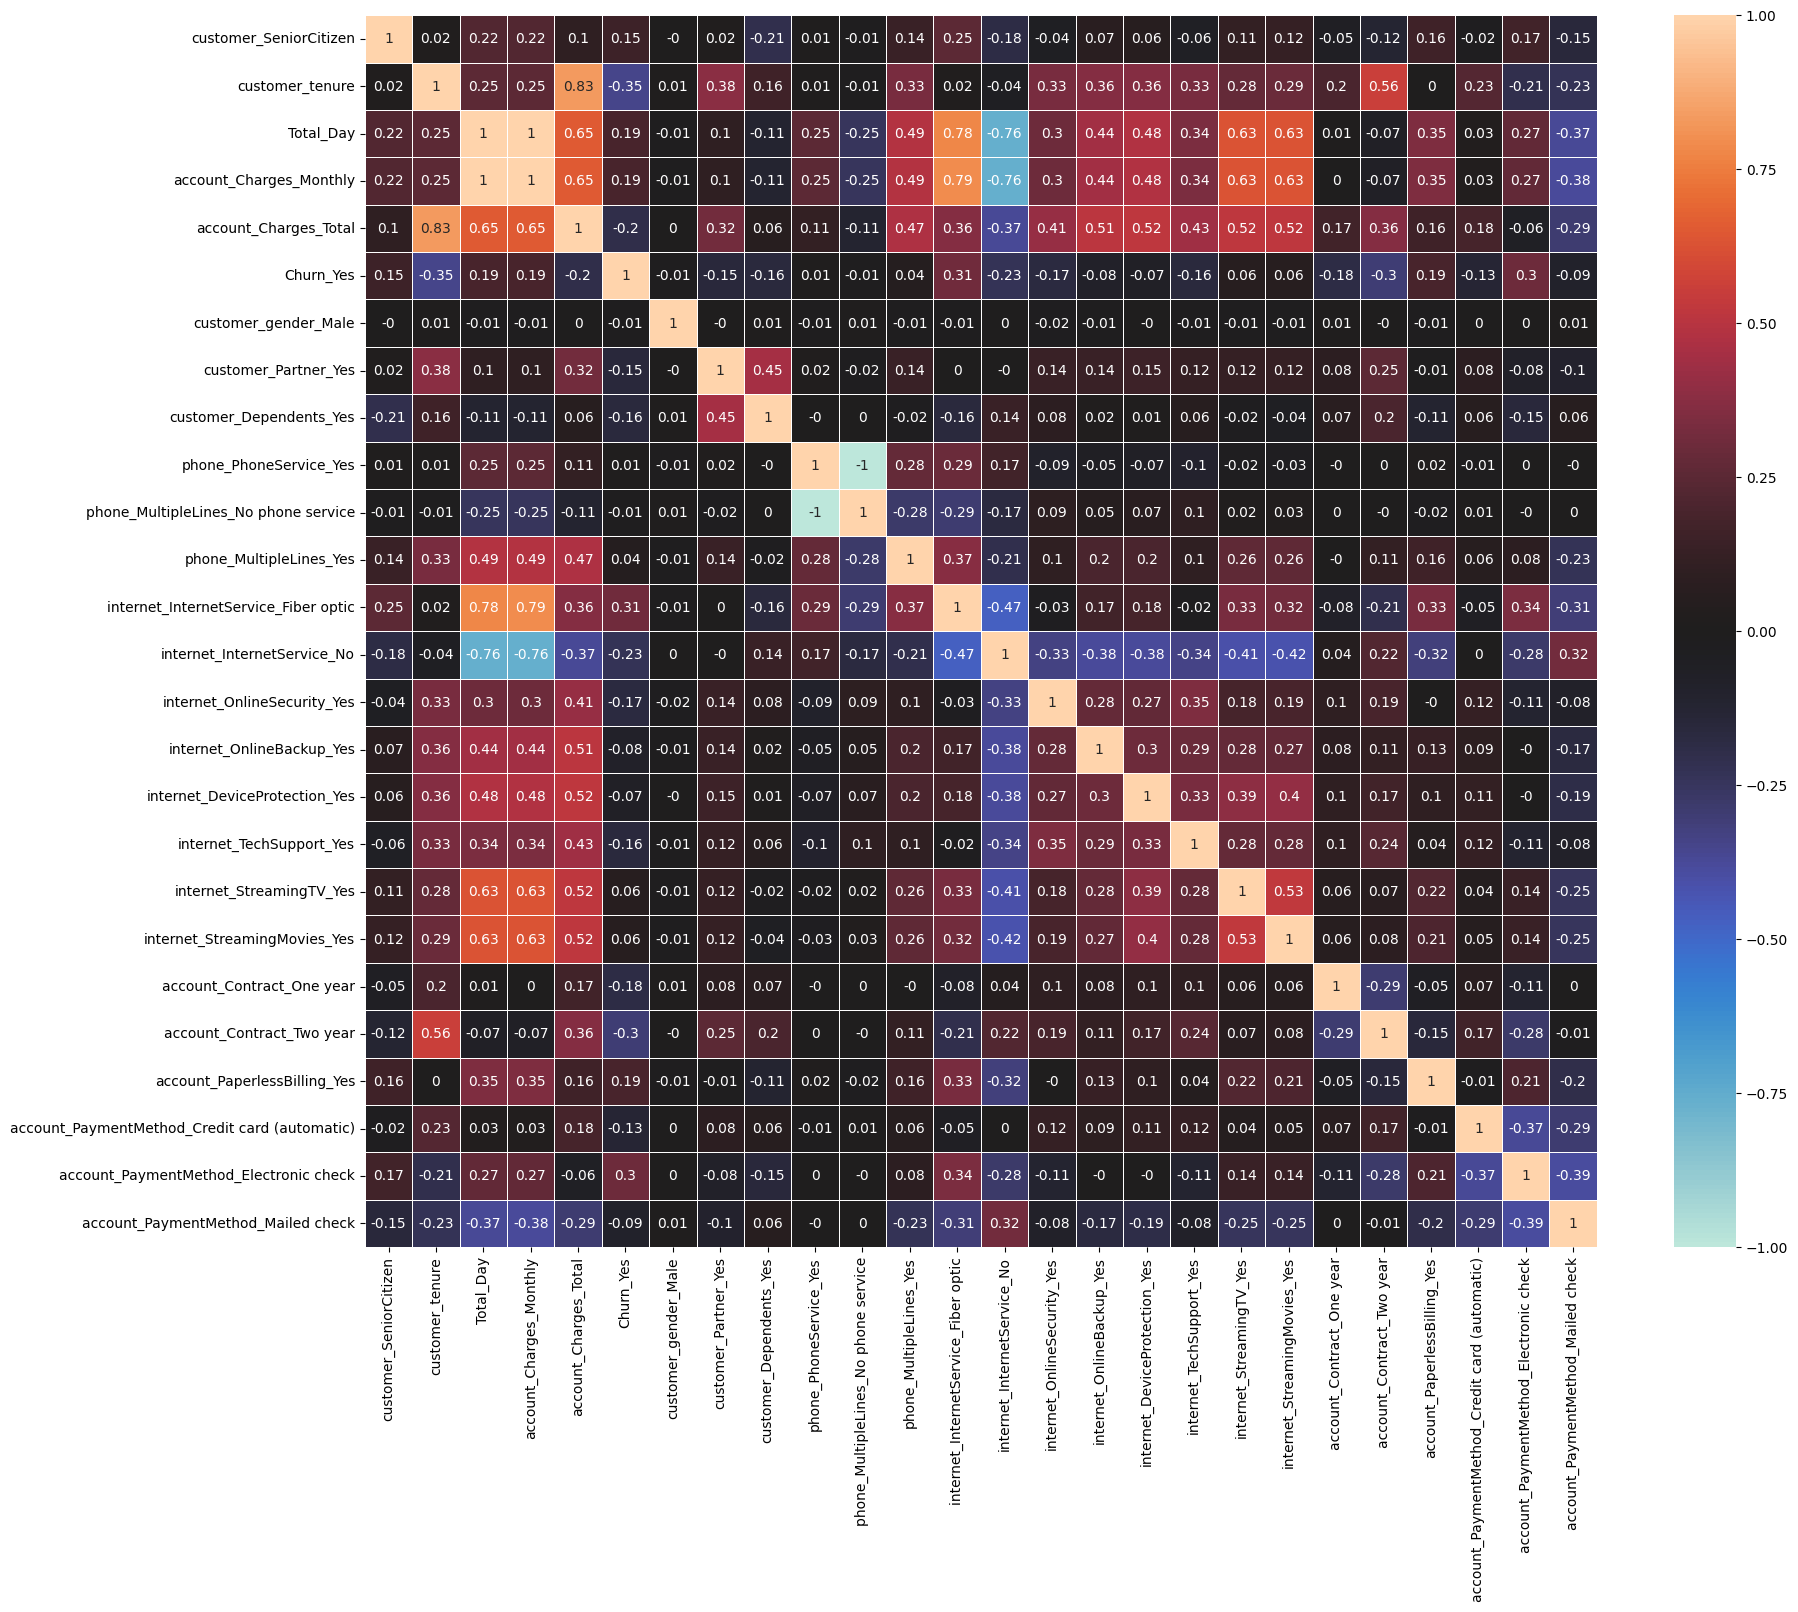

In [21]:
# Mapa de Calor
fig, ax = plt.subplots(figsize=(20,16))
ax= sns.heatmap(np.round(corr,2), vmax=1, vmin=-1, center=0,
                square=True, linewidths=.5,annot=True)
plt.show()

En general se aprecia correlaciones muy bajas para la variable Churn_Yes, pero se correlaciona inversamente con tenure (antiguedad del cliente) en un 0.35, la más alta y directamente con el servicio de  fibra optica. Es decir si un cliente es antiguo será menos probable que se vaya, y si tiene servicio de fibra óptica será más probable que se vaya.

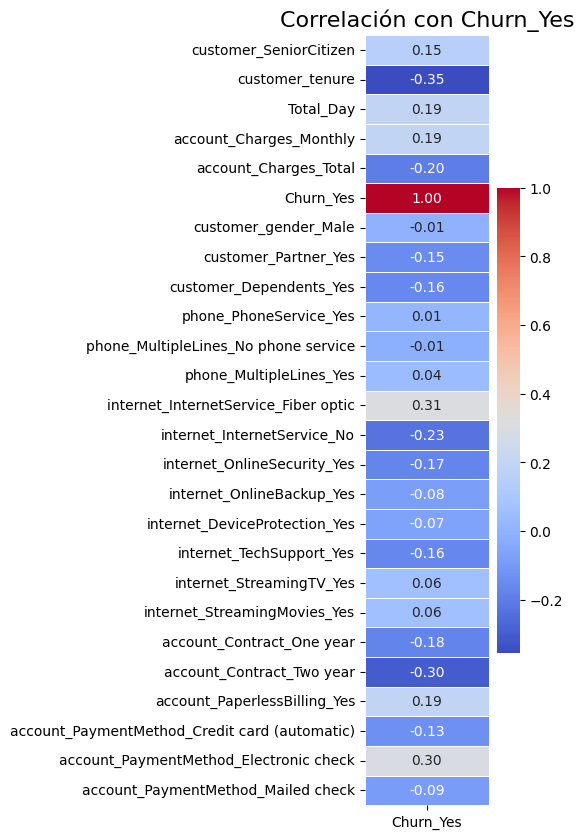

In [22]:

plt.figure(figsize=(2, 10))
sns.heatmap(corr[['Churn_Yes']], annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlación con Churn_Yes', fontsize=16)
plt.show()

In [23]:
corr_churn = corr['Churn_Yes'].sort_values(ascending=False)
print(corr_churn)

Churn_Yes                                        1.000000
internet_InternetService_Fiber optic             0.307463
account_PaymentMethod_Electronic check           0.301455
account_Charges_Monthly                          0.192858
Total_Day                                        0.192030
account_PaperlessBilling_Yes                     0.191454
customer_SeniorCitizen                           0.150541
internet_StreamingTV_Yes                         0.063254
internet_StreamingMovies_Yes                     0.060860
phone_MultipleLines_Yes                          0.040033
phone_PhoneService_Yes                           0.011691
customer_gender_Male                            -0.008545
phone_MultipleLines_No phone service            -0.011691
internet_DeviceProtection_Yes                   -0.066193
internet_OnlineBackup_Yes                       -0.082307
account_PaymentMethod_Mailed check              -0.090773
account_PaymentMethod_Credit card (automatic)   -0.134687
customer_Partn

CRITERIOS PARA LA ELIMINACIÓN DE VARIABLES

- No es necesario eliminar variables explicativas basandose únicamente en la correlación. Un valor de correlación cercano a cero puede engañar, ya que las variables pueden tener relaciones no lineales o interactuar con otras de formas que la correlación de Pearson no detecta.

- Es posible usar la importancia de las características de Random Forest como el principal criterio de selección. Para ello es necesario entrenar el modelo con todas las variables y luego usar los resultados para ver cuáles son las más relevantes. Esto es una guía mucho más precisa para seleccionar las variables que más inciden en la tasa de abandono.

- Respecto al problema de la colinealidad (variables redundantes), sí una variable tiene una correlación de 0.95 o más con otra, se puede eliminar una para simplificar el modelo, pero el no hacerlo probablemente no afectará el rendimiento del Random Forest.

- Se asume que no es necesario eliminar variables por multicolinealidad en esta etapa del proceso.

- Por lo tanto en este punto, se toma la desición de entrenar el modelo utilizando la totalidad de las variables.

# SEPARACIÓN DE VARIABLES

In [82]:
from sklearn.model_selection import train_test_split

#Variables explicativas (independientes)
X = df_encoded[[
    'customer_SeniorCitizen', 'customer_tenure', 'Total_Day',
    'account_Charges_Monthly', 'account_Charges_Total',
    'customer_gender_Male', 'customer_Partner_Yes',
    'customer_Dependents_Yes', 'phone_PhoneService_Yes',
    'phone_MultipleLines_No phone service', 'phone_MultipleLines_Yes',
    'internet_InternetService_Fiber optic', 'internet_InternetService_No',
    'internet_OnlineSecurity_Yes', 'internet_OnlineBackup_Yes',
    'internet_DeviceProtection_Yes', 'internet_TechSupport_Yes',
    'internet_StreamingTV_Yes', 'internet_StreamingMovies_Yes',
    'account_Contract_One year', 'account_Contract_Two year',
    'account_PaperlessBilling_Yes',
    'account_PaymentMethod_Credit card (automatic)',
    'account_PaymentMethod_Electronic check',
    'account_PaymentMethod_Mailed check'
]]

# Variable dependiente (objetivo)
y = df_encoded['Churn_Yes']

#División de los datos en conjuntos de entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, # 20% de los datos para probar la calidad de predicción del modelo
    random_state=42,# reproductibilidad de los resultados
    stratify=y # hace que se mantenga la misma proporción de variable dependiente, en los set de datos.
)

#Verificación de las dimensiones de los set de datos
print("*--- Dimensiones de los sets de datos ---*")
print(f"Dimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")
print(f"Dimensiones de y_train: {y_train.shape}")
print(f"Dimensiones de y_test: {y_test.shape}")

*--- Dimensiones de los sets de datos ---*
Dimensiones de X_train: (5625, 25)
Dimensiones de X_test: (1407, 25)
Dimensiones de y_train: (5625,)
Dimensiones de y_test: (1407,)


Nota:
Stratify es muy importante, porque asegura que la proporción de cada clase en la variable dependiente (por ejemplo, Churn_Yes y No) sea la misma en los conjuntos de entrenamiento y prueba que en el conjunto de datos original. Esto es de relevancia en problemas de clasificación, especialmente cuando las clases están desbalanceadas (hay muchos más clientes que no hacen churn que los que sí lo hacen).

#ENTRENAMIENTO DEL MODELO TONTO - Baseline

Un modelo tonto ideal para este caso, sería uno que siempre predice la clase mayoritaria. Es decir, si la mayoría de tus clientes no hacen churn, el modelo tonto siempre predecirá que el cliente no hará churn.

In [25]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Instancia del modelo tonto
dummy_model = DummyClassifier(strategy='most_frequent', random_state=42)# siempre predecirá la clase más frecuente
print("Entrenando el modelo tonto...")
dummy_model.fit(X_train, y_train)
print("Haciendo predicciones con el modelo tonto...")
y_dummy_pred = dummy_model.predict(X_test)# Prediciendo con la variables de prueba
print("\n--- Resultados del Modelo Tonto (Baseline) ---")
# Precisión (accuracy)
dummy_accuracy = accuracy_score(y_test, y_dummy_pred)
print(f"Precisión (Accuracy): {dummy_accuracy:.4f}\n")
# Reporte de clasificación
print(classification_report(y_test, y_dummy_pred))
# Matriz de confusión
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_dummy_pred))

Entrenando el modelo tonto...
Haciendo predicciones con el modelo tonto...

--- Resultados del Modelo Tonto (Baseline) ---
Precisión (Accuracy): 0.7342

              precision    recall  f1-score   support

       False       0.73      1.00      0.85      1033
        True       0.00      0.00      0.00       374

    accuracy                           0.73      1407
   macro avg       0.37      0.50      0.42      1407
weighted avg       0.54      0.73      0.62      1407

Matriz de Confusión:
[[1033    0]
 [ 374    0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Nota: los mensajes de advertencia se producen cuando no existen predicciones para esa clase, es normal en el modelo DummyClassifier

**La Precisión** es una métrica que mide la exactitud de las predicciones positivas de un modelo. Responde a la pregunta: "De todas las instancias que el modelo predijo como positivas, ¿cuántas eran realmente positivas?".Una precisión alta significa que cuando el modelo predice que una instancia es positiva, es muy probable que sea correcta. Una precisión baja significa que el modelo tiene muchos falsos positivos.

En el contexto de este problema de predicción de abandono de clientes (churn), la precisión para la clase "Churn" (clientes que sí abandonan) sería la proporción de clientes que el modelo predijo que abandonarían y que realmente abandonaron, sobre el total de clientes que el modelo predijo que abandonarían. Una precisión alta en este caso sería importante para asegurarse de implentar estrategias para evitar que los clientes abandonen a TELECOM, y disponer de presupuestos para mejorar aquellos aspectos que el modelo está indicando son la causa de la pérdida de clientes y obviamente de Ingresos.

**Recall**: también conocido como sensibilidad o tasa de verdaderos positivos, es una métrica que mide la capacidad del modelo para encontrar todas las instancias positivas de una clase. En otras palabras, responde a la pregunta: "De todas las instancias que realmente pertenecen a esta clase, ¿cuántas pudo identificar correctamente el modelo?".

**El F1-score** es una métrica que combina la precisión (Precision) y el recall (Recall) en una sola puntuación. Es la media armónica de la precisión y el recall.El F1-score es útil, especialmente en problemas de clasificación con clases desbalanceadas, porque te da una medida de la precisión del modelo que considera tanto los falsos positivos como los falsos negativos. Un F1-score alto indica que el modelo tiene un buen equilibrio entre precisión y recall.

Si el modelo tiene una alta precisión pero un bajo recall, el F1-score será relativamente bajo.
Si el modelo tiene un alto recall pero una baja precisión, el F1-score también será relativamente bajo.
Para tener un F1-score alto, el modelo necesita tener tanto una buena precisión como un buen recall.

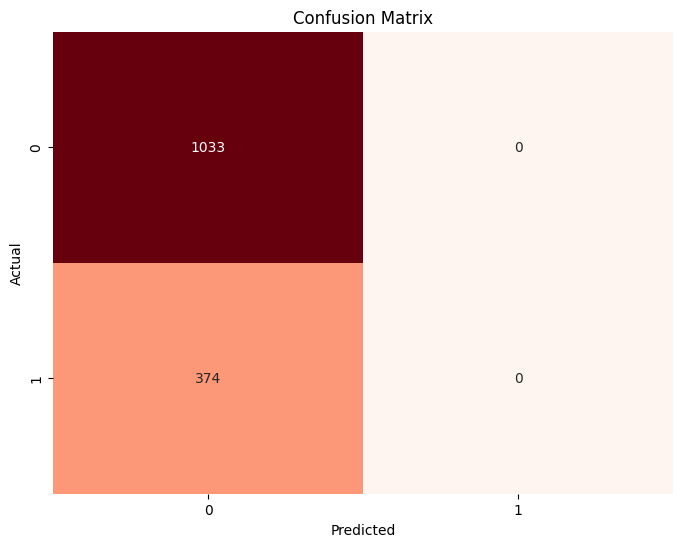

In [26]:
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_dummy_pred are already defined from the previous steps

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_dummy_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

La matriz de confusión muestra lo siguiente:

- Verdaderos Negativos (True Negatives - TN): El número en la esquina superior izquierda (1033). Estos son los casos en los que el modelo predijo correctamente que un cliente no haría churn (la clase negativa) y, de hecho, no hizo churn.
- Falsos Positivos (False Positives - FP): El número en la esquina superior derecha (0). Estos son los casos en los que el modelo predijo incorrectamente que un cliente sí haría churn (la clase positiva), pero en realidad no hizo churn.
- Falsos Negativos (False Negatives - FN): El número en la esquina inferior izquierda (374). Estos son los casos en los que el modelo predijo incorrectamente que un cliente no haría churn (la clase negativa), pero en realidad sí hizo churn.
- Verdaderos Positivos (True Positives - TP): El número en la esquina inferior derecha (0). Estos son los casos en los que el modelo predijo correctamente que un cliente sí haría churn (la clase positiva) y, de hecho, sí hizo churn.
En este caso, el modelo tonto (DummyClassifier con estrategia 'most_frequent') siempre predice la clase mayoritaria, que es "No Churn". Por lo tanto, vemos que:

Predijo correctamente que 1033 clientes no harían churn.
Predijo incorrectamente que 0 clientes harían churn (no hizo ninguna predicción positiva).
Predijo incorrectamente que 374 clientes no harían churn, cuando en realidad sí hicieron churn (estos son los falsos negativos).
Predijo correctamente que 0 clientes harían churn (no hizo ninguna predicción positiva verdadera).
Esto confirma que el modelo tonto simplemente predice la clase más frecuente y no es útil para identificar a los clientes que realmente van a hacer churn.

# ENTRENAMIENTO DEL MODELO RANDOM FOREST

Características que hacen que este modelo tenga una alta a probabilidad de predecir los clientes que harán Churn:

**- Maneja la complejidad de los datos**
Random Forest se basa en árboles de decisión, que son modelos no lineales. A diferencia de la regresión, no asumen una relación recta entre las variables y el resultado. Los datos, que incluyen una mezcla de variables categóricas (codificadas a 0 y 1) y numéricas, probablemente tienen relaciones complejas. Random Forest puede identificar estas relaciones y combinarlas para hacer predicciones.

**- Es robusto ante datos ruidosos y outliers**
El modelo es menos sensible a los datos atípicos y al ruido en comparación con otros modelos. Como construye múltiples árboles y promedia sus resultados, los errores de un solo árbol no afectan significativamente el resultado final.

**- Es excelente para la selección de características**
Random Forest tiene una función incorporada para medir la importancia de las características (feature importance). Esto indicará qué variables son las más importantes para predecir el churn, incluso si su correlación lineal con la variable objetivo es baja. Con esta información, es posible simplificar el modelo y entender mejor qué factores influyen en el abandono de clientes.

**- No requiere normalización de datos**
Random Forest no se ve afectado por la escala de las variables. Esto ahorra un paso de pre-procesamiento complejo. No importa si customer_tenure está en decenas de meses y account_Charges_Monthly está en decenas de dólares, el modelo funcionará de manera eficiente.

**- Se adapta bien a problemas de clasificación**
Por su naturaleza, este modelo es muy efectivo en problemas de clasificación como la predicción de Churn. Cada árbol en el bosque "vota" por una clase (en tu caso, Yes o No), y el modelo final elige la clase con más votos. Esto lo hace muy preciso y fiable.

En resumen, la capacidad de Random Forest para manejar relaciones no lineales y su resistencia a la multicolinealidad lo convierten en un modelo ideal para tu conjunto de datos, dándole una alta probabilidad de predecir el churn con precisión.

Tendría que haber predicho 374, y sólo predijo 182, poco menos de mitad. Este resultado es similar al que descubrí en mi análisis descriptivo anterior (52%, Challenge 2) que se producía en el tramo de costo de plan mensual de entre 70-100 US, con clientes que contrataban fibra óptica. Entonces, el Random Forest, por muchas hojas y árbolitos y esas cosas, en este punto es tan efectivo cómo un análisis descriptivo, realizado por humanos...  


Cómo punto de partida primero visualizaremos el árbol

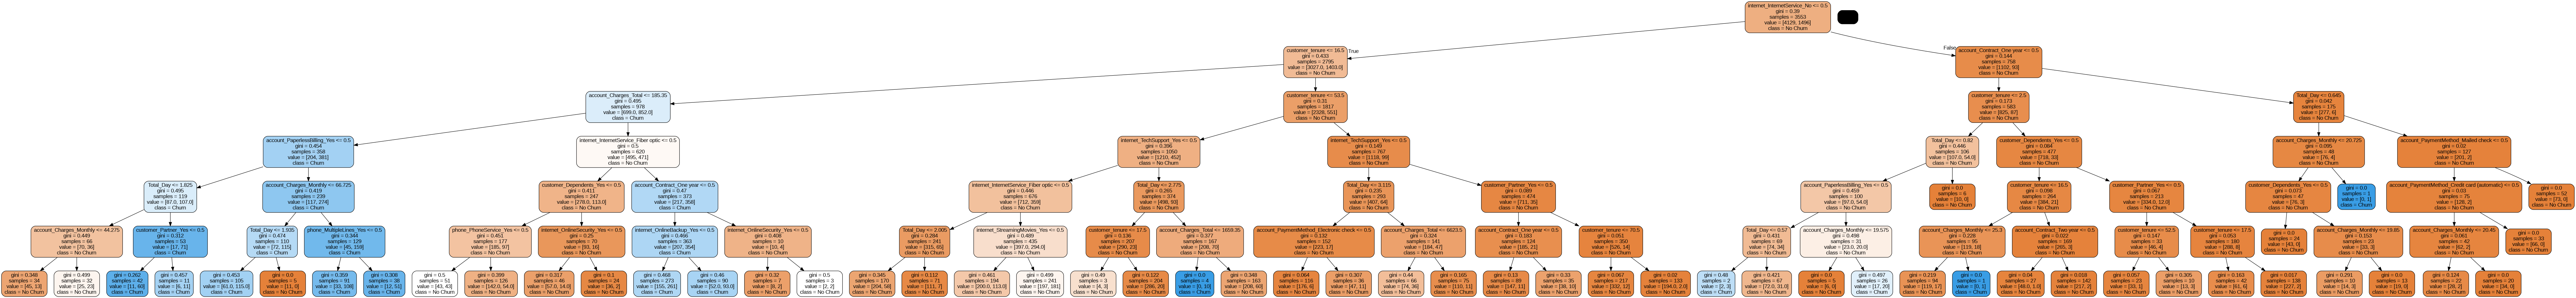

In [27]:
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
from IPython.display import Image
from sklearn.ensemble import RandomForestClassifier

#Entrenar un solo árbol para visualización
# Se crea modelo RandomForest con un solo árbol (n_estimators=1)
# y se limita la profundidad a un valor pequeño para que el gráfico sea claro.
# Sugerencia: empezar con max_depth= 3 o 4.
visual_model = RandomForestClassifier(n_estimators=1, max_depth=6, random_state=42)
visual_model.fit(X_train, y_train)

#Extraer el primer árbol del bosque
tree_to_visualize = visual_model.estimators_[0]

#Exportar el árbol a un archivo .dot
export_graphviz(
    tree_to_visualize,
    out_file="arbol_de_decision.dot",
    feature_names=X_train.columns,
    class_names=['No Churn', 'Churn'],
    filled=True,
    rounded=True
)

#Crear el gráfico desde el archivo .dot y mostrarlo
# El archivo se guardará en el directorio local
graph = pydotplus.graph_from_dot_file("arbol_de_decision.dot")
Image(graph.create_png())



Indicadores del Nodo
- condición o pregunta: Es la regla que el modelo creó para dividir los datos. Por ejemplo, account_tenure <= 10.5 o internet.InternetService_No. Si un cliente cumple la condición (verdadero), va a la izquierda. Si no la cumple (falso), va a la derecha.

- gini: Es la medida de impureza del nodo. El valor va de 0 a 1.

gini = 0: El nodo es totalmente puro. Todas las muestras en esa caja pertenecen a una sola clase (todos son Churn o todos son No Churn). El modelo no necesita hacer más divisiones.

gini = 0.5: El nodo es totalmente impuro. Las muestras están divididas equitativamente entre las clases.

El árbol siempre busca la división que reduce al máximo el valor del gini, es decir, la que hace que los nodos "hijos" sean lo más puros posible.

- samples: Es el número de muestras (clientes) que entraron en ese nodo. El primer nodo (la raíz del árbol) contendrá el número total de muestras en tu conjunto de entrenamiento (X_train). Con cada división, este número se reduce.

- value: Muestra el conteo de muestras por cada clase. Por ejemplo, value = [113, 22] significa que en ese nodo hay 113 clientes que no hacen Churn y 22 clientes que sí lo hacen. El orden de los valores se basa en la lista de clases que le pasaste al modelo (class_names=['No Churn', 'Churn']).

- class: Es la clase mayoritaria en ese nodo. El árbol predice esta clase para todas las muestras que terminen en esta "cajita". Si class es No Churn, significa que en ese nodo hay más clientes que no han hecho Churn.


Cuando la variable de clasificación es si o no, o 0 y 1. El modelo busca un punto de corte (threshold) para crear dos grupos. El umbral de 0.5 es la elección perfecta porque:

Cualquier valor menor o igual a 0.5 será 0 (la categoría "No").

Cualquier valor mayor a 0.5 será 1 (la categoría "Sí").

El tono de la caja muestra la distribución de las clases en ese nodo.

- El Tono Azul
El tono azul en las cajas indica que la mayoría de los clientes en ese nodo no hicieron churn.

Un azul más claro significa que la mayoría de los clientes son de la clase "No Churn", pero aún hay una mezcla con algunos clientes de "Churn".

Un azul más oscuro significa que el nodo es más "puro". La gran mayoría, si no todos, de los clientes en esa caja pertenecen a la clase "No Churn".

- El Tono Naranja
El tono naranja indica lo opuesto. Significa que la mayoría de los clientes en esa caja sí hicieron churn.

Un naranja más claro indica que hay una mezcla de clases, con un poco más de clientes de "Churn".

Un naranja más oscuro indica que el nodo es muy "puro", con casi todos los clientes de esa caja perteneciendo a la clase "Churn".

El árbol de decisión, en su proceso de entrenamiento, busca hacer que sus nodos finales (las "hojas") sean lo más puros posible. Por eso, los tonos se hacen más oscuros a medida que desciendes por el árbol. En cada división, el modelo busca la pregunta que haga que las cajas de los hijos sean más oscuras (más puras) que la caja de los padres.

AJUSTE DEL MODELO RANDOM FOREST

Entrenando el modelo Random Forest...
Haciendo predicciones en el conjunto de prueba...

--- Resultados de la Evaluación del Modelo ---
Precisión (Accuracy): 0.7882

              precision    recall  f1-score   support

       False       0.83      0.90      0.86      1033
        True       0.63      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Matriz de Confusión:
[[927 106]
 [192 182]]


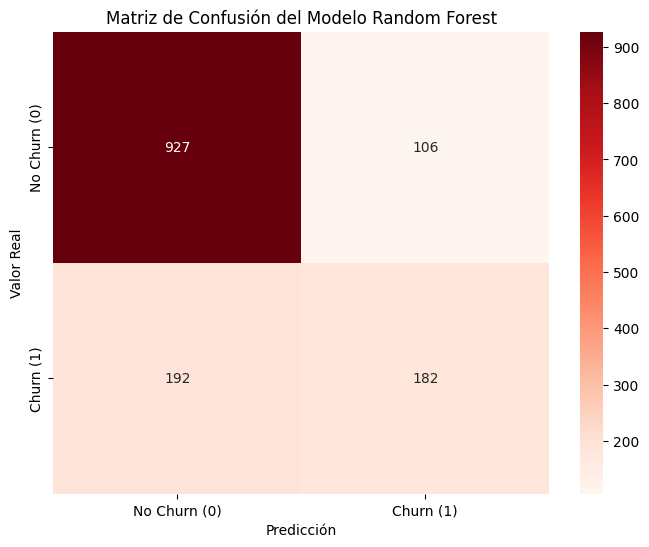

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

model = RandomForestClassifier(n_estimators=200, random_state=42)# Se la dan 200 árboles de inicio para que solito vaya buscando las relaciones, sin especificar profundidad en este punto.
print("Entrenando el modelo Random Forest...")
model.fit(X_train, y_train)
print("Haciendo predicciones en el conjunto de prueba...")
y_pred = model.predict(X_test)
print("\n--- Resultados de la Evaluación del Modelo ---")
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión (Accuracy): {accuracy:.4f}\n")
print(classification_report(y_test, y_pred))
print("Matriz de Confusión:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

#Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=['No Churn (0)', 'Churn (1)'],
            yticklabels=['No Churn (0)', 'Churn (1)'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión del Modelo Random Forest')
plt.show()

Tendría que haber predicho, 374 churn y predijo efectivamente 182, un poco menos de la mitad..., es casi igual a lo obtenido en el análisis descriptivo (Challenge 2), donde se determinó que el 52% de los clientes que hacian Churn, pertenecian al tramo de costo mensual de 70-100 US (Los planes más costosos) y que contrataban Internet de fibra óptica.

En esta etapa, el modelo no predice mejor que lanzar una moneda al aire, si evalua a cualquier cliente, dirá que la mitad abandonará y la otra no.

Este se produce porque el modelo, no sabe que el objetivo es predecir el Churn Yes, entonces máximiza la clase con mayor número de registros: Churn_No

Su mejoramiento pasa en una primera etapa por un de Balanceo de clases de la variable objetivo Churn.

In [65]:
# Construcción de una función para el ajuste y evaluación del modelo Random Forest
def auto_ajuste(X_train, X_test, y_train, y_test):
    model = RandomForestClassifier(n_estimators=200, random_state=42)
    print("Entrenando el modelo...")
    model.fit(X_train, y_train)
    print("Haciendo predicciones...")
    y_pred = model.predict(X_test)
    print("\n--- Resultados de la Evaluación del Modelo ---")
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Precisión (Accuracy): {accuracy:.4f}\n")
    print("Reporte de Clasificación:")
    print(classification_report(y_test, y_pred))
    print("Matriz de Confusión:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    # # 5. Visualizar la Matriz de Confusión
    # plt.figure(figsize=(8, 6))
    # sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
    #             xticklabels=['No Churn', 'Churn'],
    #             yticklabels=['No Churn', 'Churn'])
    # plt.xlabel('Predicción')
    # plt.ylabel('Valor Real')
    # plt.title('Matriz de Confusión del Modelo Random Forest')
    # plt.show()

    return model


In [48]:
RF_menosvar = auto_ajuste(X_train, X_test, y_train, y_test)

Entrenando el modelo...
Haciendo predicciones...

--- Resultados de la Evaluación del Modelo ---
Precisión (Accuracy): 0.7889

Reporte de Clasificación:
              precision    recall  f1-score   support

       False       0.83      0.90      0.86      1033
        True       0.64      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407

Matriz de Confusión:
[[931 102]
 [195 179]]


# BALANCEO DEL MODELO

Hay tres opciones principales para balancear un modelo y mejorar su capacidad para predecir la clase minoritaria:

Opción 1: Ajustar los pesos de clase (Class Weights)
Le dice al modelo que dé más importancia a la clase minoritaria (Churn = 1). Esto lo obliga a poner más atención a los clientes en riesgo, incluso si eso significa equivocarse en la clase mayoritaria.

Ventaja: Es muy sencillo de implementar con un solo parámetro (class_weight='balanced') y no modifica tus datos.

Desventaja: Puede no ser suficiente si el desbalance es extremo.

Opción 2: Sobremuestreo (Oversampling)
Esta técnica consiste en crear copias de los ejemplos de la clase minoritaria. Un algoritmo popular para esto es SMOTE (Synthetic Minority Over-sampling Technique), que no solo copia, sino que también crea ejemplos sintéticos basados en los datos existentes.

Ventaja: Aumenta el número de casos de Churn, lo que le da al modelo más ejemplos para aprender.

Desventaja: Puede crear "ruido" en tus datos y, en algunos casos, llevar a un sobreajuste si no se usa con cuidado.

Opción 3: Submuestreo (Undersampling)
Esta técnica consiste en reducir el número de ejemplos de la clase mayoritaria (No Churn) para que se iguale al de la clase minoritaria.

Ventaja: Simplifica el conjunto de datos y reduce el tiempo de entrenamiento.

Desventaja: Al eliminar datos, corres el riesgo de perder información valiosa de tu conjunto de datos original, lo que puede afectar el rendimiento del modelo.

¿Cuál es la mejor opción en este caso?
Eempezar con la Opción 1 (class_weight='balanced'). Es el método más simple y efectivo para el modelo  Random Forest. Si, después de usarlo, el recall no mejora lo suficiente, se puede considerar las otras dos opciones.

In [76]:
# Prueba de diferentes combinaciones de balanceo por peso, dando un peso creciente al Yes_Churn
# Lista de opciones de peso para la clase 1 (Churn)
# El peso de la clase 0 (No Churn) será siempre 1
pesos_a_probar = [1, 5, 10, 20, 50, 100]
# DataFrame para almacenar los resultados del screening
resultados_pesos = pd.DataFrame(columns=['Peso Clase 1', 'Precision (Churn)', 'Recall (Churn)', 'F1-Score (Churn)'])
# Bucle para probar cada opción de peso
for peso in pesos_a_probar:
    # Definir el diccionario de pesos
    class_weights = {0: 1, 1: peso}
    # Entrenar el modelo con el peso actual
    model = RandomForestClassifier(
        n_estimators=200,
        class_weight=class_weights,
        random_state=42
    )
    model.fit(X_train, y_train)
    # Hacer predicciones
    y_pred = model.predict(X_test)
    # Obtener el reporte de clasificación como diccionario
    reporte = classification_report(y_test, y_pred, output_dict=True)
    # Extract metricas para la clase '1' (Churn)
    precision_churn = reporte.get('1', {}).get('precision', 0.0)
    recall_churn = reporte.get('1', {}).get('recall', 0.0)
    f1_score_churn = reporte.get('1', {}).get('f1-score', 0.0)
    if precision_churn == 0.0 and 'True' in reporte:
        precision_churn = reporte['True']['precision']
        recall_churn = reporte['True']['recall']
        f1_score_churn = reporte['True']['f1-score']
    # Agregar los resultados al DataFrame
    new_row = pd.DataFrame([{
        'Peso Clase 1': peso,
        'Precision (Churn)': precision_churn,
        'Recall (Churn)': recall_churn,
        'F1-Score (Churn)': f1_score_churn
    }])
    resultados_pesos = pd.concat([resultados_pesos, new_row], ignore_index=True)

# Mostrar el DataFrame final con los resultados
print("\n--- Resultados del Screening de Pesos de Clase ---")
print(resultados_pesos)

/tmp/ipython-input-3863314104.py:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  resultados_pesos = pd.concat([resultados_pesos, new_row], ignore_index=True)



--- Resultados del Screening de Pesos de Clase ---
  Peso Clase 1  Precision (Churn)  Recall (Churn)  F1-Score (Churn)
0            1           0.631944        0.486631          0.549849
1            5           0.657993        0.473262          0.550544
2           10           0.649254        0.465241          0.542056
3           20           0.641509        0.454545          0.532081
4           50           0.664093        0.459893          0.543444
5          100           0.661597        0.465241          0.546311


El resultado anterior indica que No es posible mejorar el Recall, con Balanceo por pesos.
El objetivo principal es maximizar la identificación de clientes en riesgo de churn (clase minoritaria), lo que hace del recall la métrica más importante. Sin embargo, el modelo inicial, al estar optimizado para la precisión general, falló en este objetivo, logrando solo un recall de 0.49.

Para solucionar este problema, se exploró una estrategia de balanceo de clases. El primer paso lógico fue el más simple: el uso de los pesos de clase.

La técnica de ponderación de clases (class_weight='balanced') fue la primera opción, ya que es la forma más directa de instruir al modelo a dar más importancia a los casos de churn. Sin embargo, esta técnica no mejoró significativamente el recall, e incluso en algunos casos lo redujo. Esto lleva a una conclusión definitiva sobre la naturaleza de los datos:

El modelo no falla por falta de instrucción, sino porque le cuesta distinguir los casos de Churn de los de No Churn incluso con la instrucción de priorizarlos.

Este comportamiento indica que el problema no es el de ponderación, sino de la calidad del "conocimiento" que el modelo tiene de la clase minoritaria. Los clientes que se van son muy parecidos a los que se quedan, lo que crea una frontera de decisión borrosa para el modelo.

Dados los resultados con los pesos de clase, se concluye que es necesario una estrategia que modifique los datos para ayudar al modelo a ver las diferencias sutiles.

Dada esta situación lo recomendable es utilizar la técnica de Balanceo, NearMiss por las siguientes razones:

Se enfoca en la frontera de decisión, NearMiss no solo balancea las clases, sino que lo hace de forma inteligente al submuestrear los casos de la clase mayoritaria (No Churn) que están más cerca de los casos de Churn. Al eliminar los casos de No Churn obvios, NearMiss fuerza al modelo a concentrarse en los casos "difíciles" que se encuentran en la zona de solapamiento.

Evita la creación de ruido: A diferencia de técnicas de sobremuestreo como SMOTE, NearMiss trabaja solo con datos reales, lo que evita la posible introducción de ruido sintético que podría confundir al modelo y degradar el rendimiento.

Por lo tanto, la elección de NearMiss se justifica por ser una solución estratégica que aborda directamente la raíz del problema del modelo: la dificultad para diferenciar entre los clientes que se van y los que se quedan en la zona de solapamiento de nuestros datos.

Balanceo por NearMiss

In [83]:
# PASO 1: Verificando la división de variables:
print(X.shape)
print(y.shape)
print(f"Dimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")
print(f"Dimensiones de y_train: {y_train.shape}")
print(f"Dimensiones de y_test: {y_test.shape}")


(7032, 25)
(7032,)
Dimensiones de X_train: (5625, 25)
Dimensiones de X_test: (1407, 25)
Dimensiones de y_train: (5625,)
Dimensiones de y_test: (1407,)


In [77]:
# PASO 2: Aplicar el Balanceo NearMiss
from imblearn.under_sampling import NearMiss
nm = NearMiss()
print("Aplicando NearMiss al conjunto de entrenamiento...")
X_resampled, y_resampled = nm.fit_resample(X_train, y_train)
print("\n--- Conteo de clases después de NearMiss ---")
print(y_resampled.value_counts())


Aplicando NearMiss al conjunto de entrenamiento...

--- Conteo de clases después de NearMiss ---
Churn_Yes
False    1495
True     1495
Name: count, dtype: int64


In [78]:
# PASO 3: Entrenar el modelo con las nuevas clases balanceadas
RF_NearM= auto_ajuste(X_train, X_test, y_train, y_test)

Entrenando el modelo...
Haciendo predicciones...

--- Resultados de la Evaluación del Modelo ---
Precisión (Accuracy): 0.7882

Reporte de Clasificación:
              precision    recall  f1-score   support

       False       0.83      0.90      0.86      1033
        True       0.63      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Matriz de Confusión:
[[927 106]
 [192 182]]


In [85]:
def auto_NUEVO(X_train, X_test, y_train, y_test):
    model = RandomForestClassifier(max_depth=10, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("\n--- Resultados de la Evaluación del Modelo ---")
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Precisión (Accuracy): {accuracy:.4f}\n")
    print("Reporte de Clasificación:")
    print(classification_report(y_test, y_pred))
    print("Matriz de Confusión:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

In [81]:
RF_NearM= auto_NUEVO(X_train, X_test, y_train, y_test)

Entrenando el modelo...
Haciendo predicciones...

--- Resultados de la Evaluación del Modelo ---
Precisión (Accuracy): 0.7946

Reporte de Clasificación:
              precision    recall  f1-score   support

       False       0.83      0.91      0.87      1033
        True       0.65      0.48      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Matriz de Confusión:
[[937  96]
 [193 181]]


Aún cuando probé dos variantes del modelo Random Forest, el recall se mantiene porfiadamente en 0.49. Este resultado hace pensar, que tal vez la falla no está en el modelo en si, sino en como lo estoy evaluando ya que cuando se trabaja con datos desequilibrados y técnicas de balanceo como NearMiss, usar una simple división de train_test_split puede dar una visión engañosa del rendimiento del modelo. La división de datos puede, por casualidad, crear un conjunto de prueba que no es representativo del total de los datos y conducir a una evalución sesgada.

Por lo tanto, para efectos de descartar la posibilidad de uan evaluación sesgada, se utilizará una técnica de evaluación de modelos llamada Validación cruzada, la cual para este caso es una técnica mucho más fiable. En lugar de evaluar el modelo en un solo subconjunto de datos, lo hace en múltiples subconjuntos de manera sistemática. Al final, el resultado es un promedio de todas las evaluaciones, lo que te da una medida más robusta y honesta del rendimiento del modelo.

In [86]:
#Verificando los datos para la validación
print(X.shape)
print(y.shape)

(7032, 25)
(7032,)


In [84]:
#Importando las librerias necesarias:
from sklearn.model_selection import StratifiedKFold, cross_validate
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import NearMiss
# Define el modelo y la técnica de remuestreo
# Se usará NearMiss, debido a la naturaleza de los datos.
sampler = NearMiss()
model = RandomForestClassifier(n_estimators=200, random_state=42)
# Crea un 'pipeline' que combina el muestreo y el modelo
# para asegurar que NearMiss será aplicada correctamente dentro de cada fold de la validación cruzada.
pipeline = Pipeline([('sampler', sampler), ('classifier', model)])
# Define la estrategia de validación cruzada:
# Se utilizó StratifiedKFold, para mantener el balance de clases en cada Fold.
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# El siguiente código define las métricas a ser evaluadas.
# Estas se enfocarán en el 'recall', para la clase positiva 1, el cual es Churn
scoring = {'recall': 'recall', 'accuracy': 'accuracy', 'f1': 'f1'}
# Código para correr la Validación cruzada:
scores = cross_validate(
    pipeline,
    X,
    y,
    cv=cv,
    scoring=scoring,
    n_jobs=-1,  # Utiliza todos los núcleos de CPU disponibles para un cálculo más rápido
    return_train_score=True
)

# Impresión de los resultados
print("\n--- Cross-Validation Results ---")
print(f"Recall promedio (Test): {np.mean(scores['test_recall']):.4f}")
print(f"Recall desviación estándar (Test): {np.std(scores['test_recall']):.4f}")
print("-" * 30)
print(f"Accuracy promedio (Test): {np.mean(scores['test_accuracy']):.4f}")
print("-" * 30)
print(f"F1-Score promedio (Test): {np.mean(scores['test_f1']):.4f}")
print("-" * 30)
print("\nTodos los resultados:")
print(pd.DataFrame(scores))

Running cross-validation with NearMiss...

--- Cross-Validation Results ---
Recall promedio (Test): 0.6870
Recall desviación estándar (Test): 0.0179
------------------------------
Accuracy promedio (Test): 0.5596
------------------------------
F1-Score promedio (Test): 0.4537
------------------------------

Todos los resultados:
   fit_time  score_time  test_recall  train_recall  test_accuracy  \
0  3.611117    0.113136     0.679144      0.995318       0.519545   
1  3.411494    0.112710     0.703209      0.997324       0.570718   
2  1.875855    0.098372     0.656836      0.994652       0.551209   
3  1.895048    0.103091     0.705882      0.997993       0.554765   
4  1.297302    0.072062     0.689840      0.993311       0.601707   

   train_accuracy   test_f1  train_f1  
0        0.708444  0.429054  0.644714  
1        0.727289  0.465487  0.660319  
2        0.728582  0.437110  0.660893  
3        0.723960  0.457539  0.657703  
4        0.767330  0.479554  0.694087  


Los resultados obtenidos confirman la sospecha, que el modelo estaba siendo evaluado de forma deficiente, ya que el recall informado por la validación cruzada, subió a 0.69 en promedio

El cross_validate no es solo una función, es una metodología rigurosa que corrige las limitaciones de una sola evaluación. Funcionó porque se aplicó a diferentes conjuntos de datos, liberando al modelo de sólo un set de prueba (fijo debido al random state). El modelo, aunque pareció fallar al principio, siempre tuvo la capacidad de ser una herramienta de alto valor.

El bajo recall de las primeras prueba (0.49) fue un resultado de una división de datos aleatoria que no capturó la capacidad real del modelo. La validación cruzada, al evaluar el modelo en múltiples subconjuntos de datos, eliminó este sesgo y entregó una medida que promedia el rendimiento en toda la base de datos.

La validación cruzada demostró que la decisión de usar NearMiss fue la correcta, ya que consistentemente mostró un recall de ~0.70 en cada una de sus pruebas.

Esta técnica de evaluación entregó un valor promedio (0.69) y una desviación estándar (0,0179) que indica su consistencia. Lo que demuestra que el modelo desarrollado es robusto y generalizable a nuevos clientes.

